# **Plant Seedlings** 

**Context:**

The ability to differentiate a weed from a crop seedling effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

**Goal:**

The dataset comprises 12 plant species. Create a classifier capable of determining a plant's
species from a photo.

---
#### 1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. ***(5 Marks)***
---




In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from numpy import genfromtxt

from tensorflow.keras import datasets, models, layers, optimizers

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten


In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Fri Jul  9 11:19:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
project_path = '/content/drive/My Drive/GreatLearning/ComputerVision/PROJECT/'
dataset_labels = project_path + 'Labels.csv'
dataset_images = project_path + 'images.npy'

In [6]:
# Load the dataset
labels = genfromtxt(dataset_labels, delimiter=',', dtype=None, encoding=None, skip_header=1)
images = np.load(dataset_images)

In [7]:
# Print the shape of data
print (labels.shape)
print (images.shape)

(4750,)
(4750, 128, 128, 3)


In [8]:
labels_name, labels_count = np.unique(labels, return_counts=True)

In [9]:
images_per_class = {}
for i, class_name in enumerate(labels_name):
  print (str(class_name) + ' = ' + str(labels_count[i]))
  #images_per_class[class_name] = []
  images_per_class[class_name] = np.where(labels == class_name)


Black-grass = 263
Charlock = 390
Cleavers = 287
Common Chickweed = 611
Common wheat = 221
Fat Hen = 475
Loose Silky-bent = 654
Maize = 221
Scentless Mayweed = 516
Shepherds Purse = 231
Small-flowered Cranesbill = 496
Sugar beet = 385


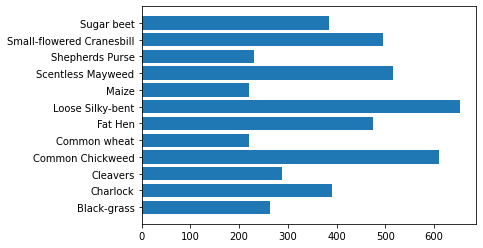

In [10]:
plt.barh(labels_name,labels_count);

In [11]:
def plot_for_class(label):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(10, 10))

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(images[images_per_class[label][0][n]])
            n += 1  



> ##### View images before pre-processing - view 4 images per class





> ###### Sugar beet



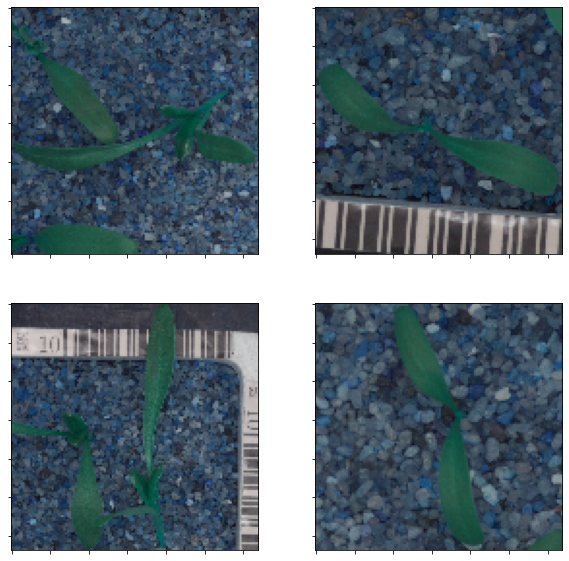

In [12]:
plot_for_class('Sugar beet')



> ###### Small-flowered Cranesbill



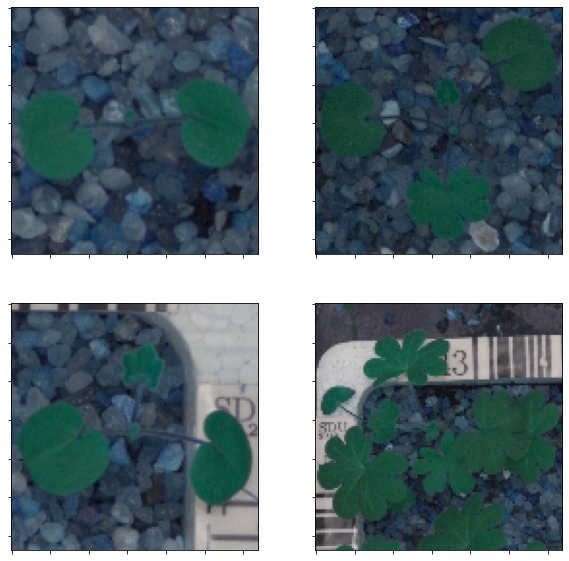

In [13]:
plot_for_class('Small-flowered Cranesbill')



> ###### Shepherds Purse



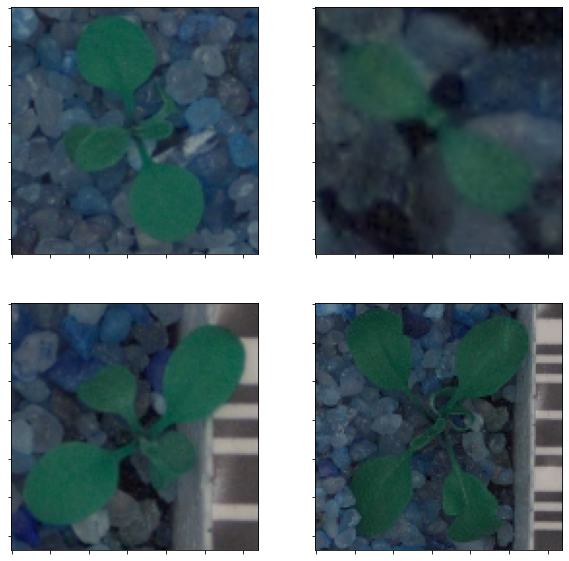

In [14]:
plot_for_class('Shepherds Purse')



> ###### Scentless Mayweed



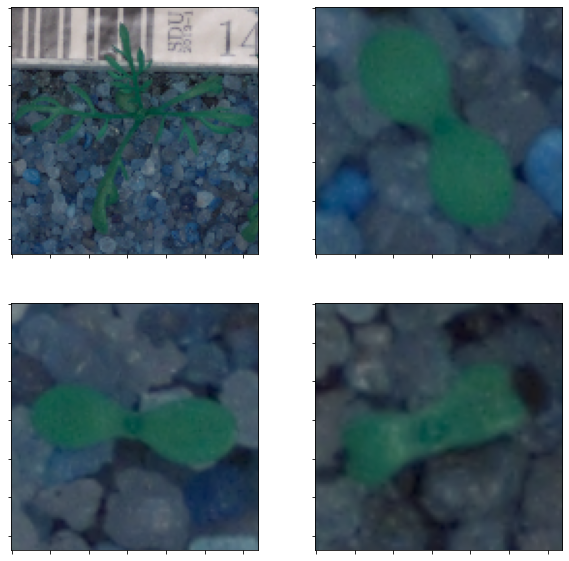

In [15]:
plot_for_class('Scentless Mayweed')



> ###### Maize



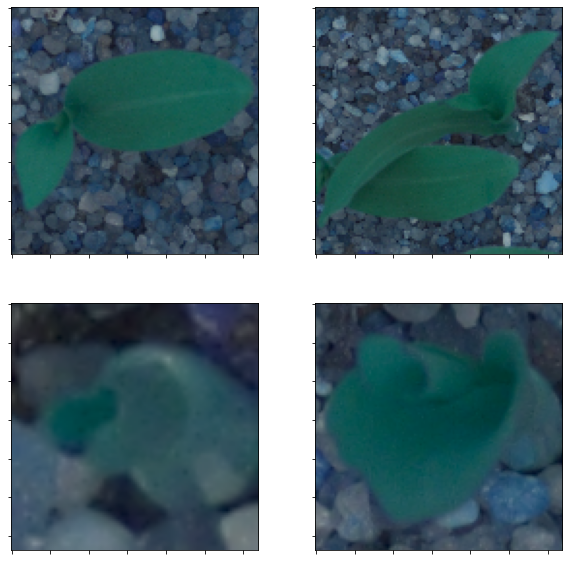

In [16]:
plot_for_class('Maize')



> ###### Loose Silky-bent



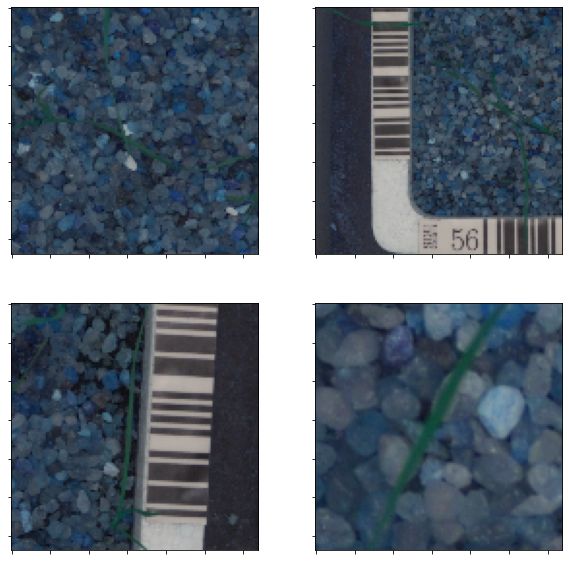

In [17]:
plot_for_class('Loose Silky-bent')



> ###### Fat Hen



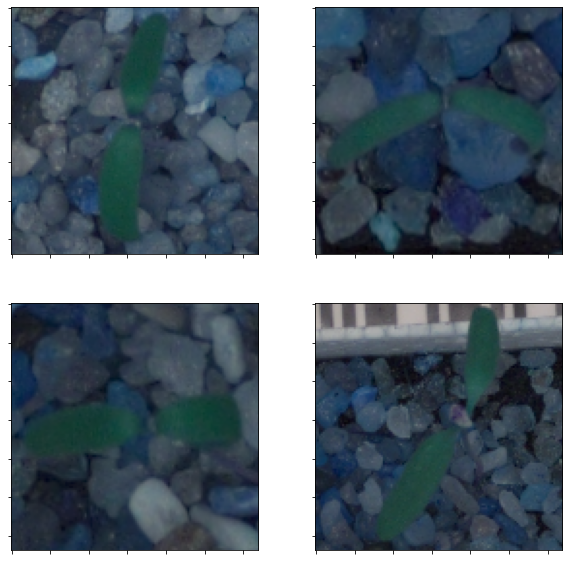

In [18]:
plot_for_class('Fat Hen')



> ###### Common wheat



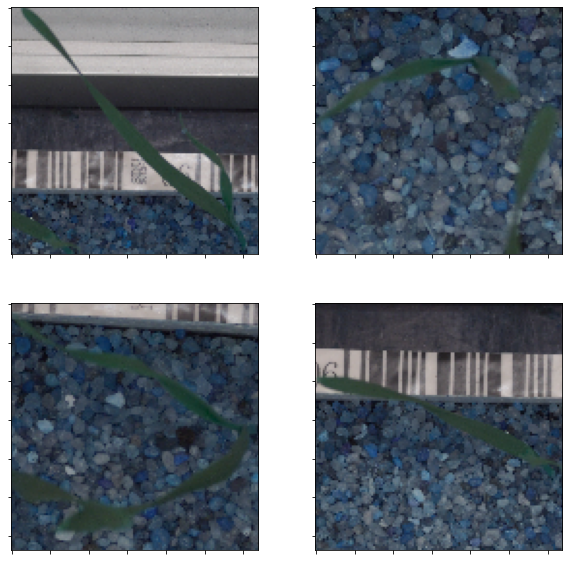

In [19]:
plot_for_class('Common wheat')



> ###### Common Chickweed



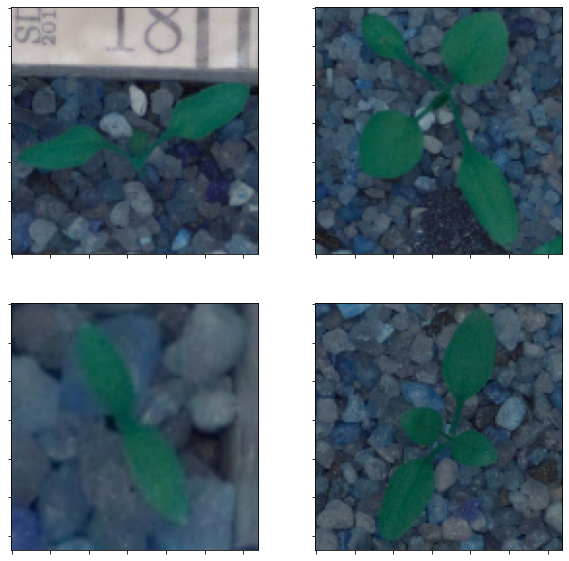

In [20]:
plot_for_class('Common Chickweed')



> ###### Cleavers



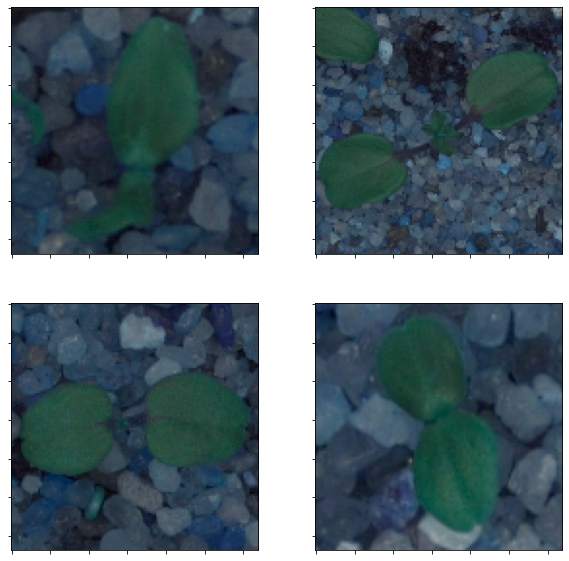

In [21]:
plot_for_class('Cleavers')



> ###### Charlock


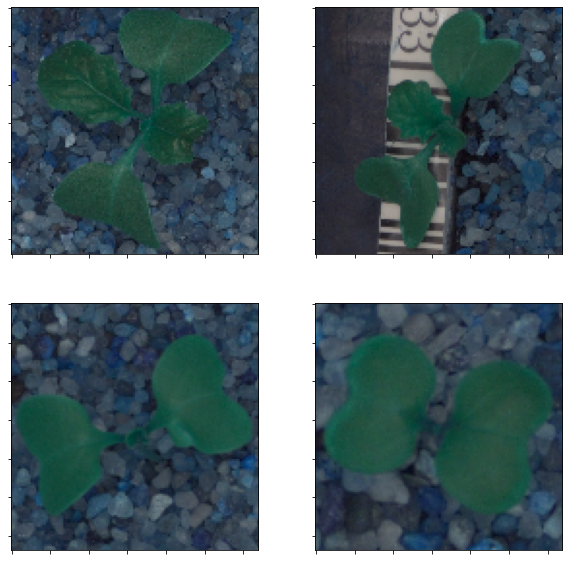

In [22]:
plot_for_class('Charlock')



> ###### Black-grass



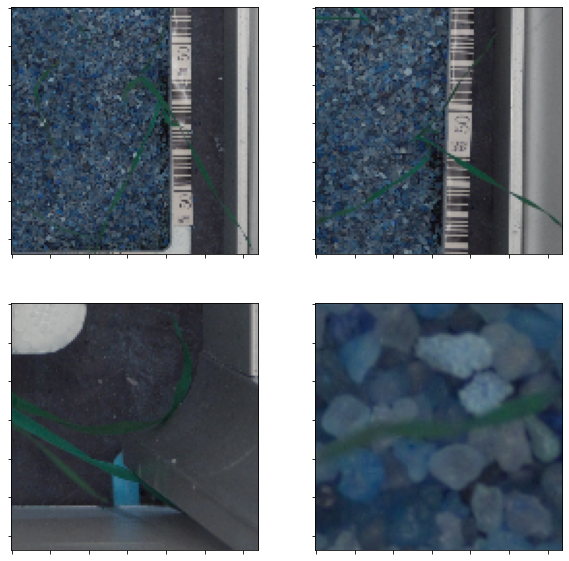

In [23]:
plot_for_class('Black-grass')

---
#### 2. Data Pre-processing: ***(15 Marks)***
---





> ###### a. Normalization.



In [ ]:
print("BEFORE NORMALIZATION:")
print("Images shape:", images.shape)
print("Images in shape:", images.shape[0])
print("Max value in Images:", images.max())
print("Min value in Images:", images.min())

BEFORE NORMALIZATION:
Images shape: (4750, 128, 128, 3)
Images in shape: 4750
Max value in Images: 255
Min value in Images: 0


In [ ]:
images = images.astype('float32')
images /= 255.0

In [ ]:
print("AFTER NORMALIZATION:")
print("Images shape:", images.shape)
print("Images in shape:", images.shape[0])
print("Max value in Images:", images.max())
print("Min value in Images:", images.min())

AFTER NORMALIZATION:
Images shape: (4750, 128, 128, 3)
Images in shape: 4750
Max value in Images: 1.0
Min value in Images: 0.0




> ###### b. Gaussian Blurring.



In [ ]:
preprocessed_images = []

In [ ]:
for idx, img in enumerate(images):
  blurImg = cv2.GaussianBlur(images[idx], (3, 3), 1)
  preprocessed_images.append(blurImg)   

In [ ]:
preprocessed_images = np.asarray(preprocessed_images)



> ###### c. Visualize data after pre-processing.



```
Let's take a look at the images after pre-processing. 
There are 4,750 images. 
That are too many to show here. 
So, let's pick 5 samples to view: Before and After
```

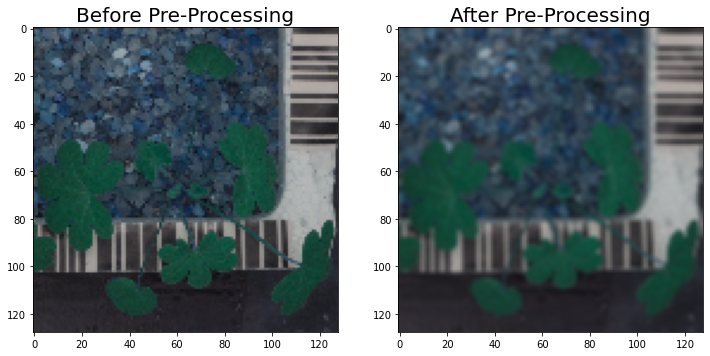

In [ ]:
fig, axs = plt.subplots(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.title('Before Pre-Processing', fontsize=20)
plt.imshow(images[76]);

plt.subplot(1, 2, 2)
plt.title('After Pre-Processing', fontsize=20)
plt.imshow(preprocessed_images[76]);

plt.show()

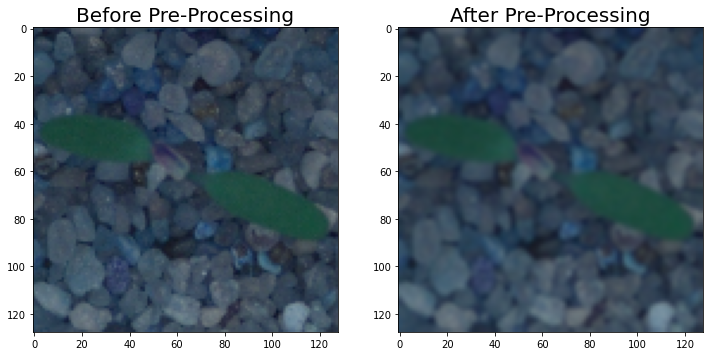

In [ ]:
fig, axs = plt.subplots(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.title('Before Pre-Processing', fontsize=20)
plt.imshow(images[562]);

plt.subplot(1, 2, 2)
plt.title('After Pre-Processing', fontsize=20)
plt.imshow(preprocessed_images[562]);

plt.show()

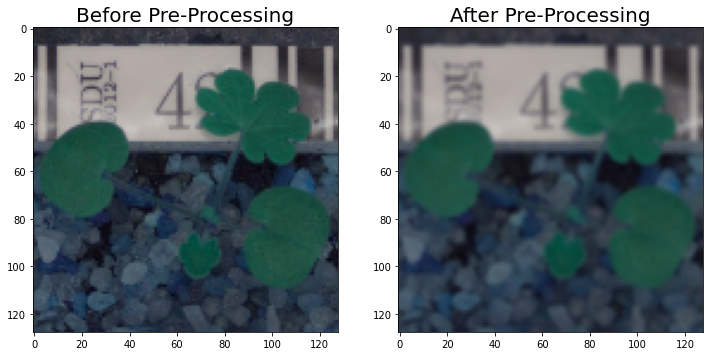

In [ ]:
fig, axs = plt.subplots(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.title('Before Pre-Processing', fontsize=20)
plt.imshow(images[277]);

plt.subplot(1, 2, 2)
plt.title('After Pre-Processing', fontsize=20)
plt.imshow(preprocessed_images[277]);

plt.show()

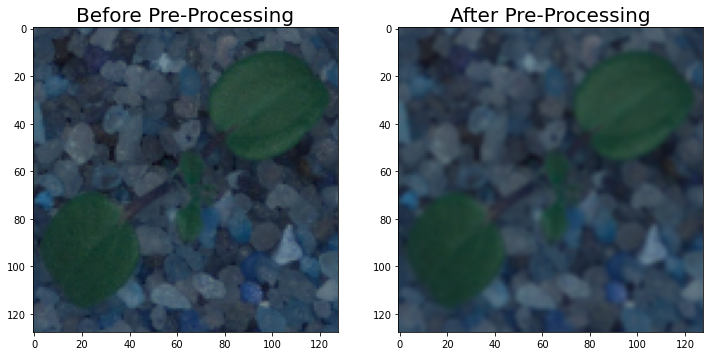

In [ ]:
fig, axs = plt.subplots(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.title('Before Pre-Processing', fontsize=20)
plt.imshow(images[2654]);

plt.subplot(1, 2, 2)
plt.title('After Pre-Processing', fontsize=20)
plt.imshow(preprocessed_images[2654]);

plt.show()

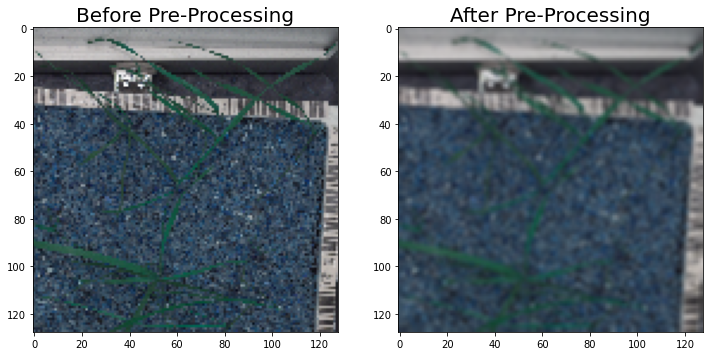

In [ ]:
fig, axs = plt.subplots(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.title('Before Pre-Processing', fontsize=20)
plt.imshow(images[4013]);

plt.subplot(1, 2, 2)
plt.title('After Pre-Processing', fontsize=20)
plt.imshow(preprocessed_images[4013]);

plt.show()

```
The images above show the results of Gaussian Blurring in a "Before and After" layout. 
It's important not to apply exceesive blurring. 
We only want to apply enough blurring to reduce noise in the images.
```

---
#### 3. Make data compatible: ***(10 Marks)***
---



> ###### a. Convert labels to one-hot-vectors.



In [ ]:
# Convert labels to one hot vectors.
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(labels)

In [ ]:
y = y.astype('float32')

In [ ]:
print("Shape of y_train:", y.shape)
print("One value of y_train:", y[0])

Shape of y_train: (4750, 12)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
type(y)

numpy.ndarray

In [ ]:
np.unique(y)

array([0., 1.], dtype=float32)



> ###### c. Split the dataset into training, testing, and validation set.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, y, test_size=0.3, random_state=42)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)



> ###### b. Print the label for y_train[0].



In [ ]:
print(y_train[0])
print(f'The label for y_train[0] = {y_train[0].argmax()} ({labels_name[np.where(y_train[0])[0][0]]})')

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The label for y_train[0] = 2 (Cleavers)




> ###### d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.



In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)


In [ ]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3325, 12)
(712, 12)
(713, 12)


```
Sequential model in tensorflow.keras expects data to be in the format (n_s, n_h, n_w, n_c)
n_s= number of samples, n_h = height, n_w = width, n_c = number of channels

Reshaping is not required. 
The shapes of X_train, X_test and X_val are already compatible to feed into Keras Models. 
```

---
#### 4. Building CNN: ***(15 Marks)***
---



> ###### a. Define layers.



```
Let's define a sequential model with multiple convolutional layers.
The number of filters in each layer will be 32 or 64.
We'll try kernel sizes of 3, 5 and 7.
Dropout and MaxPooling are used.
After the conolutional layers, we flatten the data and send to the fully connected layers.
```

In [ ]:
# Set the CNN model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (7, 7), padding='same', activation="relu"))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(12, activation="softmax"))




> ###### b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)



In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 64)       

---
#### 5. Fit and evaluate model and print confusion matrix. ***(10 Marks)***
---

In [ ]:
%%time
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=26,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose=1,
                    #callbacks=[early_stopping, model_checkpoint]
                    )


Epoch 1/26
104/104 [==============================] - 3s 20ms/step - loss: 2.4400 - accuracy: 0.1332 - val_loss: 2.3765 - val_accuracy: 0.2482
Epoch 2/26
104/104 [==============================] - 2s 17ms/step - loss: 2.0210 - accuracy: 0.2902 - val_loss: 1.6898 - val_accuracy: 0.4208
Epoch 3/26
104/104 [==============================] - 2s 17ms/step - loss: 1.5689 - accuracy: 0.4427 - val_loss: 1.2665 - val_accuracy: 0.5568
Epoch 4/26
104/104 [==============================] - 2s 17ms/step - loss: 1.2797 - accuracy: 0.5365 - val_loss: 1.2166 - val_accuracy: 0.5652
Epoch 5/26
104/104 [==============================] - 2s 17ms/step - loss: 1.1254 - accuracy: 0.5928 - val_loss: 1.0224 - val_accuracy: 0.6592
Epoch 6/26
104/104 [==============================] - 2s 17ms/step - loss: 0.9810 - accuracy: 0.6454 - val_loss: 0.9601 - val_accuracy: 0.6746
Epoch 7/26
104/104 [==============================] - 2s 17ms/step - loss: 0.8783 - accuracy: 0.6881 - val_loss: 0.8441 - val_accuracy: 0.7195

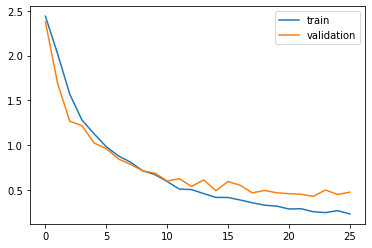

In [ ]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

- We ran this for 26 epochs. Model performance starts to plateau at 20 epochs.


---



In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Loss:', scores[0])
print('Accuracy:', scores[1])

23/23 [==============================] - 0s 7ms/step - loss: 0.4543 - accuracy: 0.8413
Loss: 0.4542939364910126
Accuracy: 0.841292142868042


- **The Model's Accuracy is `84%`.**

---

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
rounded_labels=np.argmax(y_test, axis=1)

In [ ]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(rounded_labels, y_pred)
print(cm)

=== Confusion Matrix ===
[[16  0  0  0  4  0 21  0  0  0  0  0]
 [ 0 38  9  0  0  1  0  0  0  2  5  0]
 [ 0  1 46  1  0  0  0  0  1  0  0  0]
 [ 0  0  0 87  0  0  0  0  0  0  1  0]
 [ 1  0  0  0 30  2  0  0  0  0  0  0]
 [ 0  0  2  0  0 71  0  0  0  0  1  0]
 [ 9  0  0  0  2  0 90  0  0  0  0  0]
 [ 0  0  1  0  0  3  0 22  2  0  1  1]
 [ 1  0  3  3  0  3  0  0 56  6  0  2]
 [ 0  0  0  4  0  1  0  0  3 34  5  1]
 [ 0  0  2  1  0  0  0  0  1  0 68  0]
 [ 0  1  1  0  0  2  0  0  1  0  1 41]]


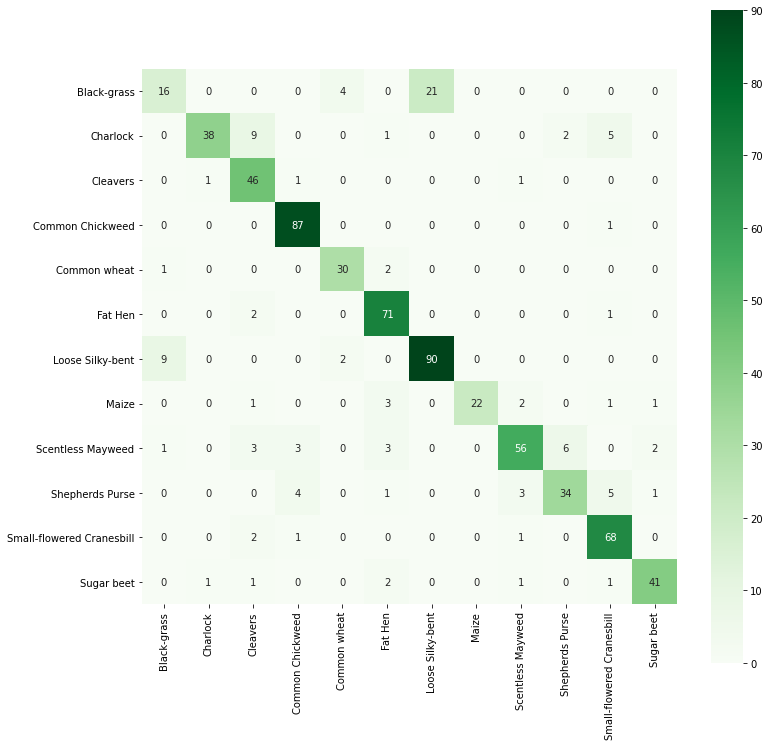

In [ ]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=labels_name, yticklabels=labels_name)


---
#### 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. ***(5 Marks)***
---

True Label: 6 (Loose Silky-bent)
Predicted Label: 0 (Black-grass)


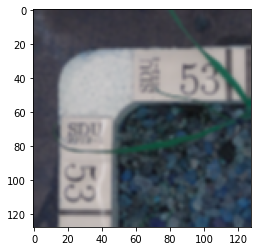

In [ ]:
i = 2
plt.imshow(X_test[i])
y_pred = model.predict_classes(X_test)[i]
#print("Predicted label:", y_pred)
#print("Softmax Outputs:", y_pred)
print(f'True Label: {y_test[i].argmax()} ({labels_name[y_test[i].argmax()]})')
print(f'Predicted Label: {y_pred} ({labels_name[y_pred]})')


- The Model's prediction for `x_test[2]` is incorrect. The Model predicted `Black-grass` but the True class is `Loose Silky-Bent`.

---



True Label: 3 (Common Chickweed)
Predicted Label: 3 (Common Chickweed)


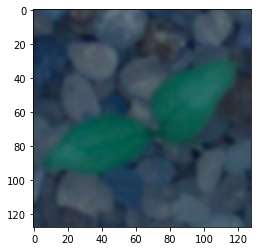

In [ ]:
i = 3
plt.imshow(X_test[i])
y_pred = model.predict_classes(X_test)[i]
#print("Predicted label:", y_pred)
#print("Softmax Outputs:", y_pred)
print(f'True Label: {y_test[i].argmax()} ({labels_name[y_test[i].argmax()]})')
print(f'Predicted Label: {y_pred} ({labels_name[y_pred]})')

- The Model's prediction for `x_test[3]` is correct. The Model correctly predicted `Common Chickweed`.

---

True Label: 4 (Common wheat)
Predicted Label: 4 (Common wheat)


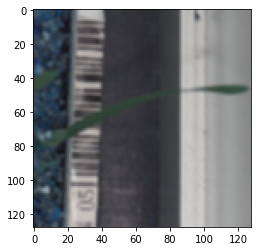

In [ ]:
i = 33
plt.imshow(X_test[i])
y_pred = model.predict_classes(X_test)[i]
#print("Predicted label:", y_pred)
#print("Softmax Outputs:", y_pred)
print(f'True Label: {y_test[i].argmax()} ({labels_name[y_test[i].argmax()]})')
print(f'Predicted Label: {y_pred} ({labels_name[y_pred]})')

- The Model's prediction for `x_test[33]` is correct. The Model correctly predicted `Common Wheat`.

---

True Label: 4 (Common wheat)
Predicted Label: 4 (Common wheat)


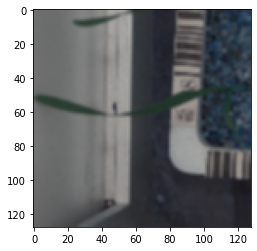

In [ ]:
i = 36
plt.imshow(X_test[i])
y_pred = model.predict_classes(X_test)[i]
#print("Predicted label:", y_pred)
#print("Softmax Outputs:", y_pred)
print(f'True Label: {y_test[i].argmax()} ({labels_name[y_test[i].argmax()]})')
print(f'Predicted Label: {y_pred} ({labels_name[y_pred]})')

- The Model's prediction for `x_test[36]` is correct. The Model correctly predicted `Common Wheat`.

---

True Label: 10 (Small-flowered Cranesbill)
Predicted Label: 10 (Small-flowered Cranesbill)


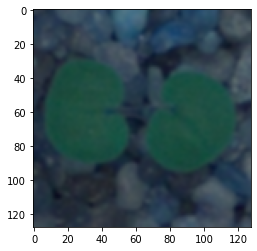

In [ ]:
i = 59
plt.imshow(X_test[i])
y_pred = model.predict_classes(X_test)[i]
#print("Predicted label:", y_pred)
#print("Softmax Outputs:", y_pred)
print(f'True Label: {y_test[i].argmax()} ({labels_name[y_test[i].argmax()]})')
print(f'Predicted Label: {y_pred} ({labels_name[y_pred]})')

- The Model's prediction for `x_test[59]` is correct. The Model correctly predicted `Small-flowered Cranesbill`.

---

#### **Conclusion:**

This model's accuracy is 84% in predicting the 12 classes of plant seedlings.

`Common Chickweed` and `Common Wheat` are easily classified.

`Black-grass` is the most difficult to classify and is often misclassified as `Loose Silky Bent`

Future Models on this dataset should incude additional noise-reduction techniques and OpenCV augmentation methods. 

Transfer Learning should also be attempted and compared with the results of this basic CNN.


In [25]:
%%shell
jupyter nbconvert --to html /content/Plant_Seedlings_b0721_b.ipynb

[NbConvertApp] Converting notebook /content/Plant_Seedlings_b0721_b.ipynb to html
[NbConvertApp] Writing 8101270 bytes to /content/Plant_Seedlings_b0721_b.html
